In [5]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import json, re

from graphs import Graphs

from platform import python_version
print(python_version())


3.9.7


# Reading in Survey Questions

In [17]:
# https://stackoverflow.com/questions/46317639/how-can-i-handle-reading-a-json-file-in-it-that-has-comments-with-python/46317842
# https://docs.python.org/3/tutorial/inputoutput.html

with open('sleep.jsonc', 'r') as f:
    s = f.read()
s = str(s)

jsonObject = json.loads(re.sub("//.*","",s,flags=re.MULTILINE))
print(jsonObject)


{'id': 'sleep', 'name': 'Sleep Survey', 'tileText': 'Sleep survey and activities', 'imageUrl': '/data/images/bigstock-Exhausted-Young-Businessman-Or-375803701.jpg', 'pages': {'survey': True, 'scientists': True, 'graphs': True, 'demo': True, 'teacher-resources': True, 'download': True, 'partners': True, 'contact': True}, 'survey': {'heading': 'How did you sleep?', 'introduction': '**Teachers:** To create a unique identifier for your class or school, click [here](/data/identifier). Give that identifier to your students so they can enter it for this survey.\n\n**Students/Others:** Please do not enter any personal information into the survey. No personal identifiers are collected.\n\n**Required Fields:** Are noted with an asterisk ( * ). Unless noted, answer questions thinking about **the past week**.', 'sections': [{'id': 'Weekdays', 'heading': 'Weekdays (required)', 'introduction': '**Weekdays (Sunday-Thursday nights). Please answer all questions in this section. Remember, think about th

# Reading in the survey data from the csv file
This will also prepare the data for graphing

In [16]:
s_data = pd.read_csv('surveydata.csv')

#Step 1 Localise the data
title_data = "How rested or refreshed do you feel when you wake up for the day?"
data_bar = s_data[title_data] #Note When Using How - usualy categorical data from 1-5, what is usaully some other type
frequency = data_bar.value_counts(sort=False).sort_index(ascending=True).to_numpy() #Extracts the frequncy of responses per category
ypos =  np.arange(len(frequency)) #Automatically assigns indexs for each number in the data

temp = data_bar.unique() #Extracted range of different rows
temp = np.sort(temp)  #Sorting Range into order


# Graphing a barchart

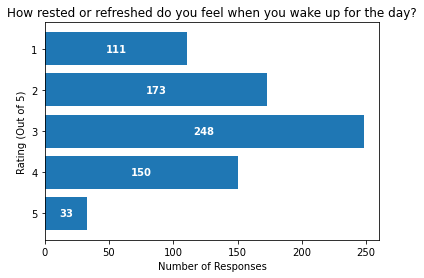

In [17]:
from graphs import Graphs


gph = Graphs()
# gph.graph_bar(title="How rested or refreshed do you feel when you wake up for the day?", title_x="Number of Responses", title_y="Rating (Out of 5)", data_x=frequency, data_y=ypos, label_y=temp)
gph.graph_bar(title="How rested or refreshed do you feel when you wake up for the day?", title_x="Number of Responses", title_y="Rating (Out of 5)", data_x=frequency, label_y=temp)

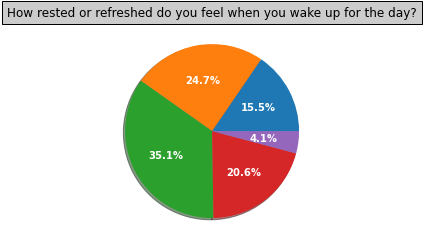

In [5]:
gph.graph_pie(title="How rested or refreshed do you feel when you wake up for the day?", data=frequency, labels=temp)